* 한글 패키지

In [ ]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
drive.mount('/content/drive')

Mounted at /gdrive
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline 
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# minus 표시
mpl.rcParams['axes.unicode_minus']=False
plt.rc('font',family='NanumBarunGothic')

In [ ]:
import warnings

warnings.filterwarnings(action='ignore') 

In [ ]:
healthcare = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/healthcare_edit.csv'
map = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/회피가능사망율(의료지도).csv'
hos = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/인구대비데이터정리.csv'
die = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/회피가능사망자수_십만명당.csv'
ghos = '/content/drive/MyDrive/4조_헬스케어/자료파일/1차전처리/면적당 요양기관수.csv'

* 데이터 전처리

In [ ]:
# 데이터 불러오기
main = pd.read_csv(healthcare)
die = pd.read_csv(map)
hospital = pd.read_csv(hos)

In [ ]:
hospital = hospital[['천명당 의료인수', '천명당 의사수', '천명당 간호사수','천명당 병상수','천명당 요양기관수']]

In [ ]:
hoss = pd.read_csv('병원.csv')
hoss = hoss[['천명당 상급+종합병원수', '천명당 상급종합병원수', '천명당 종합병원수', '천명당 병원수', '천명당 의원수']]

In [ ]:
ghospital = pd.read_csv(ghos)

In [ ]:
df = pd.read_csv('입원및비용.csv')
df = df.set_index('시도코드')

### 데이터 합치기

In [ ]:
del die['Unnamed: 0']
die = die.set_index('시도코드')

In [ ]:
# 합치기 
total = df.join(die['지표비율'], how ='left')

In [ ]:
total = total.reset_index()

In [ ]:
total= total.join(hoss)

In [ ]:
ghospital = ghospital[['면적당 요양기관수','면적당 요양기관수(상급)', '면적당 요양기관수(상급+종합)', '면적당 요양기관수(종합)', '면적당 요양기관수(병원)',
       '면적당 요양기관수(의원)']]

In [ ]:
total = total.join(ghospital)

In [ ]:
total = total.join(hospital)

In [ ]:
# df_die['Label']열 만들기 
total['Label'] = ''
for i in range(len(total['지표비율'])):
  if total['지표비율'][i] <= 90:
    total['Label'][i] = '우수'
  elif total['지표비율'][i] <= 100:
    total['Label'][i] = '보통'
  elif total['지표비율'][i] <= 110:
    total['Label'][i] = '열악'    
  else:
    total['Label'][i] = '매우열악'


In [ ]:
total.columns

Index(['시도코드', '입내원일수', '심결요양급여비용총액', '십만명당 입내원일수', '십만명당 요양급여총액',
       '십만명당 회피가능사망자수', '지표비율', '천명당 상급+종합병원수', '천명당 상급종합병원수', '천명당 종합병원수',
       '천명당 병원수', '천명당 의원수', '면적당 요양기관수', '면적당 요양기관수(상급)', '면적당 요양기관수(상급+종합)',
       '면적당 요양기관수(종합)', '면적당 요양기관수(병원)', '면적당 요양기관수(의원)', '천명당 의료인수',
       '천명당 의사수', '천명당 간호사수', '천명당 병상수', '천명당 요양기관수', 'Label'],
      dtype='object')

In [ ]:
# 관련 없는 열 삭제 
del total['입내원일수']
del total['심결요양급여비용총액']

In [ ]:
total.columns=['시도코드', '십만명당 입내원일수', '십만명당 요양급여총액', '천명당 요양기관수','천명당 상급+종합병원수', '천명당 상급종합병원수',
       '천명당 종합병원수', '천명당 병원수', '천명당 의원수', '천명당 의료인수', '천명당 의사수', '천명당 간호사수', '천명당 병상수', 
       '면적당 요양기관수', '면적당 요양기관수(상급)','면적당 요양기관수(상급+종합)', '면적당 요양기관수(종합)', '면적당 요양기관수(병원)', 
       '면적당 요양기관수(의원)','십만명당 회피가능사망자수', '지표비율', 'Label']

# PCA 분석
- 참고자료 : https://plotly.com/python/pca-visualization/

In [ ]:
total.columns

NameError: ignored

In [ ]:
x = total[['천명당 요양기관수', '천명당 상급+종합병원수',
       '천명당 상급종합병원수', '천명당 종합병원수', '천명당 병원수', '천명당 의원수', '천명당 의료인수', '천명당 의사수', '십만명당 회피가능사망자수']].values # 독립변인들의 value값만 추출
y = total[['Label']].values # 종속변인 추출


In [ ]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)

In [ ]:
features = x_std.T
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.0625     -0.09993878  0.49549368 -0.08382717  0.52223232  0.2261977
  -0.31836733 -0.34414644  0.36743342]
 [-0.09993878  1.0625     -0.34167863 -0.27037801 -0.29359425 -0.59009225
  -0.06067474  0.05780276 -0.62401106]
 [ 0.49549368 -0.34167863  1.0625      0.2077229   1.04129512  0.6826042
  -0.01840395 -0.29290046  0.76886885]
 [-0.08382717 -0.27037801  0.2077229   1.0625     -0.00355948  0.57028483
   0.6094067   0.20134073  0.44089598]
 [ 0.52223232 -0.29359425  1.04129512 -0.00355948  1.0625      0.58043514
  -0.14229258 -0.33947384  0.6946238 ]
 [ 0.2261977  -0.59009225  0.6826042   0.57028483  0.58043514  1.0625
   0.17554165 -0.12593627  0.95837082]
 [-0.31836733 -0.06067474 -0.01840395  0.6094067  -0.14229258  0.17554165
   1.0625      0.47520583  0.01991292]
 [-0.34414644  0.05780276 -0.29290046  0.20134073 -0.33947384 -0.12593627
   0.47520583  1.0625     -0.26147139]
 [ 0.36743342 -0.62401106  0.76886885  0.44089598  0.6946238   0.95837082
   0.01991292 -0.26147139  1

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [ ]:
eig_vals

array([ 4.18151523e+00,  2.31177058e+00,  9.52192370e-01,  7.21370631e-01,
        6.37585947e-01,  4.35347374e-01,  2.42377352e-01,  8.03405210e-02,
       -5.44158796e-17])

In [ ]:
eig_vecs

array([[-2.52565399e-01,  3.31968180e-01,  2.81147167e-01,
        -1.00827435e-01,  8.35300690e-01,  1.53320339e-01,
         1.12663436e-01, -5.35772926e-02, -2.32162907e-16],
       [ 2.91792675e-01,  1.71267897e-01,  6.36043897e-01,
        -4.12506168e-01, -1.84154296e-01, -4.69944797e-01,
         2.28107841e-01,  6.33802818e-02, -1.98508025e-16],
       [-4.51515517e-01,  9.38525962e-02,  3.48272875e-01,
         1.30617742e-01, -2.51593720e-01,  6.68763681e-02,
        -2.83346649e-01, -3.52081039e-02,  7.06875983e-01],
       [-1.81802215e-01, -5.17879775e-01,  5.06074250e-02,
        -4.99469929e-01,  1.85778662e-01, -1.58337681e-01,
        -6.05673023e-01,  2.33905483e-02, -1.40519430e-01],
       [-4.23546039e-01,  2.00672885e-01,  3.44865658e-01,
         2.34429569e-01, -2.94200126e-01,  1.00286908e-01,
        -1.66150598e-01, -4.06419432e-02, -6.93239233e-01],
       [-4.34369568e-01, -2.20696258e-01, -1.52061983e-01,
        -7.15483927e-02, -3.36564819e-02, -3.615549

* 74% 의 데이터를 사용

In [ ]:
eig_vals[0] / sum(eig_vals)

0.43728263809659107

In [ ]:
projected_X = x_std.dot(eig_vecs.T[0])

In [ ]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis']= 0.0
result['label'] = y

result

,PC1,y-axis,label
0,1.755996,0.0,보통
1,-1.686834,0.0,우수
2,0.162183,0.0,매우열악
3,0.947292,0.0,보통
4,-4.596237,0.0,우수
5,0.390491,0.0,열악
6,0.103149,0.0,우수
7,3.978959,0.0,열악
8,2.532054,0.0,열악
9,-0.629412,0.0,열악


Text(0.5, 1.0, 'PCA result')

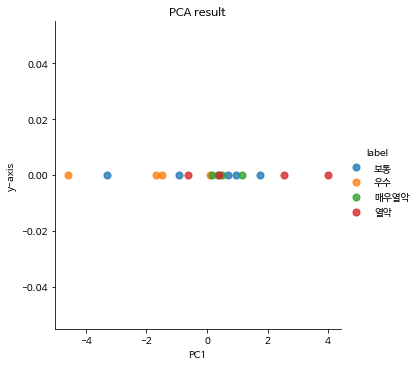

In [ ]:
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,
           scatter_kws={"s": 50},
           hue='label')

plt.title('PCA result')

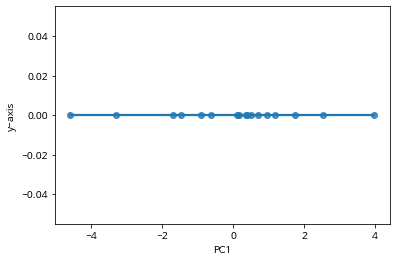

In [ ]:
fig = sns.regplot('PC1', 'y-axis', data=result)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0 )
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(x_test)
print(y_test)
print(y_pred)

NameError: ignored

* PCA 실행

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component1', 'principal component2', 'principal component3'])

NameError: ignored

In [ ]:
principalDf.head()

,principal component1,principal component2,principal component3
0,-15.603837,-1.444540,-4.356462
1,5.716646,17.418064,-2.209813
2,-20.591136,-8.399253,6.414442
3,-16.199672,2.373392,-3.296941
4,-19.604824,15.683162,8.546850


In [ ]:
pca.explained_variance_ratio_ * 100

array([87.80525522, 10.33817951,  1.85531388])

Visualize all the principal components

In [ ]:
data = total

pca = PCA()
components = pca.fit_transform(data[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions = range(3),
    color = data["Label"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

KeyError: ignored

2D PCA Scatter Plot

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(x)

fig = px.scatter(components, x=0, y=1, color=total['Label'])
fig.show()

Visualize PCA with px.scatter_3d

In [ ]:
pca = PCA(n_components=3)
components = pca.fit_transform(x)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color= total['Label'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)

fig.show()

Visualize Loadings
  - It is also possible to visualize loadings using shapes, and use annotations to indicate which feature a certain loading original belong to.

In [ ]:
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
components = pca.fit_transform(x)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=total['Label'])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

ValueError: ignored

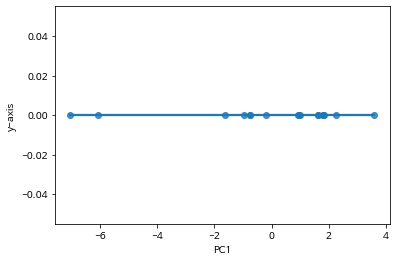

In [ ]:
sns.regplot('PC1', 'y-axis', data=result, fit_reg=True)